In [31]:
import numpy
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.neural_network._multilayer_perceptron import MLPClassifier

def tanh(x):
    return (1.0 - numpy.exp(-2 * x)) / (1.0 + numpy.exp(-2 * x))


def tanh_derivative(x):
    return (1 + tanh(x)) * (1 - tanh(x))


class NeuralNetwork:
    def __init__(self, net_arch):
        self.activity = tanh
        self.activity_derivative = tanh_derivative
        self.layers = len(net_arch)
        self.steps_per_epoch = 1000
        self.arch = net_arch
        self.weights = []
        #zakres wartości wag (–1,1)
        for layer in range(self.layers - 1):
            w = 2 * numpy.random.rand(net_arch[layer] + 1, net_arch[layer + 1]) - 1
            self.weights.append(w)

    def fit(self, data, labels, learning_rate=0.1, epochs=100):
        ones = numpy.ones((1, data.shape[0]))
        Z = numpy.concatenate((ones.T, data), axis=1)
        training = epochs * self.steps_per_epoch
        for k in range(training):
            if k % self.steps_per_epoch == 0:
                print('epochs: {}'.format(k / self.steps_per_epoch))
                for s in data:
                    print(s, nn.predict(s))

                    sample = numpy.random.randint(data.shape[0])
                    y = [Z[sample]]
                    for i in range(len(self.weights) - 1):
                        activation = numpy.dot(y[i], self.weights[i])
                        activity = self.activity(activation)
                        #dodaj przesunięcie do następnej warstwy
                        activity = numpy.concatenate((numpy.ones(1),
                                                      numpy.array(activity)))
                        y.append(activity)
                        #ostatnia warstwa
                        activation = numpy.dot(y[-1], self.weights[-1])
                        activity = self.activity(activation)
                        y.append(activity)

                        #błąd dla warstwy wyjścia
                        error = labels[sample] - y[-1]
                        delta_vec = [error * self.activity_derivative(y[-1])]  #należy zacząć od tyłu
                        #od przedostatniej warstwy
                        for i in range(self.layers - 2, 0, -1):
                            error = delta_vec[- 1].dot(self.weights[i][1:].T)
                            error = error * self.activity_derivative(y[i][1:])
                            delta_vec.append(error)
                        #Teraz trzeba ustawić wartości od tyłu do przodu
                        delta_vec.reverse()

                        for i in range(len(self.weights)):
                            layer = y[i].reshape(1, nn.arch[i] + 1)
                            delta = delta_vec[i].reshape(1, nn.arch[i + 1])
                            self.weights[i] += learning_rate * layer.T.dot(delta)


    def predict(self, x):
        val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activity(numpy.dot(val, self.weights[i]))
            val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))

            return val[1]

    def plot(self, X, labels):
        mlp = MLPClassifier(random_state=1)
        mlp.fit(X, labels)
        markers = ('*', '^', 'x')
        colors = ('brown', 'green', 'yellow')
        cmap = ListedColormap(colors)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        resolution = 0.01
        x, y = numpy.meshgrid(numpy.arange(x_min, x_max, resolution), numpy.arange(y_min, y_max, resolution))
        Z = mlp.predict(numpy.array([x.ravel(), y.ravel()]).T)
        Z = Z.reshape(x.shape)
        plt.pcolormesh(x, y, Z, cmap=cmap)
        plt.xlim(x.min(), x.max())
        plt.ylim(y.min(), y.max())
        classes = ["0", "1"]
        for index, cl in enumerate(numpy.unique(labels)):
            plt.scatter(X[labels == cl, 0], X[labels == cl, 1], c=cmap(index), marker=markers[index], s=50, label=classes[index])
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend(loc='upper left')
        plt.show()



/Users/kkepins-macwro_1/git/machine_learning/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


epochs: 0.0
[0 0] 0.09731802370952727
[0 1] 0.19863259217264917
[1 0] 0.0028144818283047917
[1 1] 0.24313700817673672
epochs: 1.0
[0 0] 0.16443143974714142
[0 1] 0.3275169960718582
[1 0] -0.054945864788239714
[1 1] 0.05151266596797136
epochs: 2.0
[0 0] 0.0716603124551996
[0 1] 0.20942534939485552
[1 0] -0.20662719973795093
[1 1] -0.14595021708392214
epochs: 3.0
[0 0] -0.008331837591937459
[0 1] 0.07028613211644168
[1 0] -0.25170251310361
[1 1] -0.1936748386714243
epochs: 4.0
[0 0] -0.044625962333134435
[0 1] 0.052056311077390637
[1 0] -0.28163607873100066
[1 1] -0.21214165964202047
epochs: 5.0
[0 0] -0.06593472567698477
[0 1] 0.1933043606814847
[1 0] -0.16455270645729167
[1 1] 0.06937628008702643
epochs: 6.0
[0 0] 0.04791866055781859
[0 1] 0.23978935507128585
[1 0] -0.180257528237613
[1 1] -0.02226209149403298
epochs: 7.0
[0 0] -0.0057395742329797265
[0 1] 0.2924704078033648
[1 0] -0.21664507080425333
[1 1] 0.06174242947071143
epochs: 8.0
[0 0] 0.015207280810852776
[0 1] 0.219529450567

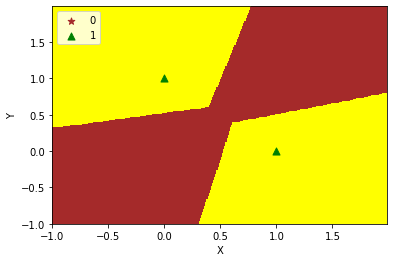

In [33]:
numpy.random.seed(0)
#Zainicjowanie obiektu klasy NeuralNetwork z #2 neuronami wejściowymi
#2 neuronami ukrytymi
#1 neuronem wyjściowym
nn = NeuralNetwork([2,6,1])
X = numpy.array([[0, 0],
                 [0, 1],
                 [1, 0],
                 [1, 1]])
y = numpy.array([0, 1, 1, 0])

#Ustawienie etykiet — prawidłowych wyników operacji XOR y = numpy.array([0, 1, 1, 0])
#Wywołanie funkcji fit i trenowanie sieci
#dla wybranej liczby epok
nn.fit(X, y)
print("Ostateczna prognoza")
for s in X:
    print(s, nn.predict(s))

nn.plot(X, y)